![Emotions Meter Picture](https://www.escardio.org/static_file/Escardio/Medias/education/covid-19/Covid-19-Webpage-banner-1170x240-opt2.jpg?mts=1584466417349.jpg)

# **LUSIP - 8** - *COVID-19 Sentiment Analysis Project*
****

**Team Members:**
> **Tanmay Vijay** *(Rajasthan Technical University, Kota)*<br>
> **Ayan Chawla** *(DAV University, Jalandhar)*<br>
> **Balan Dhanka** *(University of Rajasthan, Jaipur)*<br>

This notebook contains our **code and analysis** to perform Sentiment Analysis on COVID-19 Twitter Data.<br>

**Sentiment analysis** *is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques.*

**Coronavirus disease** *(COVID-19) is an infectious disease caused by a virus discovered in 2019. Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.*


****

Corona Virus has created varying sentiments among people within its run. Here we analyze those sentiments and try to find out how people of various states of India coped up with the situation.






# **Data Collection**
****

#### Data Collection was one of the lengthy and major tasks to perform. 
Data was collected using ***GetOldTweets3*** API (*Python*) and was stored in multiple files state-wise and month-wise. Three keywords (corona, COVID, COVID-19) were searched for collecting tweets shared among diferent states. For instance a file named ***Assam_01_tweets.csv*** contains the tweets shared in Assam during January. <br>

### Months:
* **11** = November, 2019
* **12** = December, 2019
* **01** = January, 2020
* **02** = February, 2020
* **03** = March, 2020
* **04** = April, 2020
* **05** = May, 2020

In [0]:
# Installing required libraries

!pip install GetOldTweets3

In [0]:
# Imports

import time # To use sleep function
import GetOldTweets3 as got # API library to get tweets data
import pandas as pd # To create dataframes and save CSVs

In [0]:
# Lists of queries to be searched, States and their approximate radius and Date ranges to collect tweets from.

# List of various queries in text
queries_list = ['corona', 'COVID', 'COVID-19',]

# List of all States in India with their approx. radius.
states_list = [
  ['Andhra Pradesh',140], ['Arunachal Pradesh',101], ['Assam',98], ['Bihar',111], ['Chhattisgarh',129],
  ['Goa',21], ['Gujarat',155], ['Haryana',74], ['Himachal Pradesh',83], ['Jammu & Kashmir',165],
  ['Jharkhand',99], ['Karnataka',154], ['Kerala',69], ['Madhya Pradesh',195], ['Maharashtra',195],
  ['Manipur',52], ['Meghalaya',53], ['Mizoram',51], ['Nagaland',43], ['Odisha',138],
  ['Punjab',79], ['Rajasthan',205], ['Sikkim',30], ['Tamil Nadu',127], ['Telangana',117],
  ['Tripura',36], ['Uttarakhand',81],  ['Uttar Pradesh',173], ['West Bengal',104]
]

# List of Date ranges to scrap data within
dates_list = [
  ("2019-11-01", "2019-11-30"), # Nov, 2019
  ("2019-12-01", "2019-12-31"), # Dec, 2019
  ("2020-01-01", "2020-01-31"), # Jan, 2020
  ("2020-02-01", "2020-02-29"), # Feb, 2020
  ("2020-03-01", "2020-03-31"), # Mar, 2020
  ("2020-04-01", "2020-04-30"), # Apr, 2020
  ("2020-05-01", "2020-05-30"), # May, 2020
]

In [0]:
# Using GetOldTweets3 to collect all tweets data
# Queries created using above mentioned queries_list, states_list, dates_list

for state, within in states_list: # Loop over states
  for since_date, until_date in dates_list: # Loop over Date Ranges
    text_tweets = [] # Initialize empty list for each month

    i = 0
    while i < len(queries_list): # Loop over Query text
      query_text = queries_list[i]
      
      # Creating Query Object
      tweetCriteria = got.manager.TweetCriteria().setQuerySearch(query_text).setMaxTweets(1000).setNear(state).setSince(since_date).setUntil(until_date).setLang("en").setWithin(f"{within}mi")
      
      # Getting Tweets from API
      try:
        tweets = got.manager.TweetManager.getTweets(tweetCriteria)
      except: # In case of API exceptions
        print("Error at", i)
        time.sleep(10) # To account for API call limits
        continue

      text_tweets.extend( [tweet.text for tweet in tweets] )
      i += 1
      
    # Creating a DataFrame Object from Collected Tweets
    df = pd.DataFrame({"Tweets": text_tweets}, columns=['Tweets',]) 
    df = df.drop_duplicates().reset_index(drop=True) # Removing Duplicate Data points if any

    df.to_csv(f"{state[:-7]}_{since_date[5:7]}_tweets.csv", index=False) # Saving data as a CSV

  print(state, end=", ") # Print State that is successfully completed
print("\nDone") # Success

Andhra Pradesh, Arunachal Pradesh, Assam, Bihar, Chhattisgarh, Goa, Gujarat, Haryana, Himachal Pradesh, Jammu & Kashmir, Jharkhand, Karnataka, Kerala, Madhya Pradesh, Maharashtra, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Punjab, Rajasthan, Sikkim, Tamil Nadu, Telangana, Tripura, Uttarakhand, Uttar Pradesh, West Bengal, 
Done


![alt text](https://qph.fs.quoracdn.net/main-qimg-d92d95c9ffba23f88a108ee29f661468)
# **Finding Polarities**
****

***Polarity*** is a relationship between two opposite characteristics or tendencies, like the polarity of two sides of a debate, or of the superhero and villain in a comic book. Polarity can literally refer to a positive or negative electric charge.<br>
In NLP, Polarity reflects the Positive or Negative expression of a Tweet.<br>

<br>

#### Finding Polarities using TextBlob Library
> To find the polarities ***TextBlob*** API was used on each tweet and its Polarity was stored in Polarity attribute.<br>

> Each Tweet must be cleaned before using the API because it can contain Usernames, Hashtags, URLs. For that a function **clean_data** was created and each tweet was passed through it.<br>

> API returns a value in range [-1,+1] where -1 means Extreme Negative Polarity,  +1 means Extreme Positive Polarity and 0 means neutral.<br>

Another attribute is added to make polarity a Categorical Vaiable called ***Sentiments***.<br>
If polarity is in range [-1,0) then the Sentiment is *Negative*. <br>
If polarity is in range (0,+1] then the Sentiment is *Positive*. <br>
If polairty is 0 then Sentiment is *Neutral*.<br><br>

Each value was stored and new CSV files were generated State-wise and Month-wise.

For instance-:
<br>
File named '***Andhra Pradesh_01_polarity.csv***' contains tweets during January month along with the Polarity (Floating Number) and Sentiment(String).


In [0]:
# Installing required libraries

!pip install textblob

In [0]:
# Imports

from textblob import TextBlob
import pandas as pd
import re

In [0]:
# Lists

# List of Indian States
states_list = [
  'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
  'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
  'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
  'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
  'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
  'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal',
]

# List of Months for which Polarities have to be found
months_list = ['11', '12', '01', '02', '03', '04', '05'] # Nov, 2019 - to - May, 2020

In [0]:
# Function to clean the tweets in the dataset
def clean_data(string):
  """
  This function removes all user-tags (@username),
  special characters (anything not within 0-9, a-z, A-Z, space( ) and tabs(\t) )
  and URL links in the tweets
  """

  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", string).split())

In [0]:
# Code to find Polarities of each dataset file (Statewise and Monthwise)

for state in states_list: # To loop over states
  for month in months_list: # To loop over Months
    file_name = f"data/{state}_{month}_tweets.csv" # Input file

    # Reading Dataset
    try:
      tweets = pd.read_csv(file_name)
    except:
      # In case file is not found
      print(state, month) # Print the file details
      continue # and skip the file

    # Apply cleaning function on all tweets
    tweets['Tweets'] = tweets['Tweets'].apply(clean_data)

    # Code to find Polarites of individual tweets    
    pol = [] # Empty list to store Polarities

    for index in tweets.index: # Looping over all tweets
      # Finding polarity
      polarity = TextBlob(tweets['Tweets'][index]).sentiment.polarity
      # Adding polarity to list of polarities
      pol.append(polarity)
    
    tweets['Polarity'] = pol # Creating Polarity column in the dataset


    # Code to Categorize polarities found for each tweet
    pol=[] # Empty list to store Categorical Polarities

    for index in tweets.index: # Looping over all tweets
      if tweets['Polarity'][index] > 0:   # Positive case
        pol.append("Positive")
      elif tweets["Polarity"][index] < 0: # Negetive Case
        pol.append("Negative")
      else:                               # Neutral Case
        pol.append("Neutral")

    tweets['Sentiments'] = pol # Creating Sentiments column in the dataset

    # Saving the dataset statewise-monthwise
    tweets.to_csv("output/" + file_name[5:-10] + "polarity.csv", index=False)

## **Combining Data**
****

In this section, we combine the various datasets created during Data Collection and Finding Polarity phase into more managable and workable datasets.

* We combine the poalrity datasets statewise, i.e., we create a common dataset with months column for each state

* After that, we also combine all the newly formed statewise datasets to form a large combined dataset.

This newly formed large dataset contains 124286 data points, which is the total no. of tweets collected.

In [0]:
# Imports
import pandas as pd

In [0]:
# List of all Indian States
states_list = [
  'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
  'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
  'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
  'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
  'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
  'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal',
]

# List of months to loop over (except 11; 11 is handled manually for initializing the 'big_df')
months_list = ['12', '01', '02', '03', '04', '05']

### ***Combining Data: Statewise***


### Steps:
1. Loop over all states
> 1. Read first file from Statewise-Monthwise dataset with Polarity for that state.
> 2. Add month information to the data frame.
> 3. Loop over all months and read the corresponding file.
> > 1. Add month information to the data frame.
> > 2. Combine with the first file
> 4. Save the big data frame into CSV



In [0]:
# Code to create Statewise Datasets with Polarity and Sentiments column
for state in states_list: # Looping over all states
  big_df = pd.read_csv(f"{state}_11_polarity.csv") # Reading Nov, 2019 (11) file for each state
  big_df['Month'] = ['11',]*big_df.shape[0] # Creating Month column in the dataset

  for month in months_list: # Looping over all months
    file_name = f"{state}_{month}_polarity.csv" # File name

    df = pd.read_csv(file_name) # Reading dataset file for each month for each state
    df['Month'] = [month]*df.shape[0] # Creating Month column in the dataset

    big_df = pd.concat([big_df, df], ignore_index=True) # Concatenating both data frames
  
  big_df.to_csv(f"{state}_combined.csv", index=False) # Saving the combined file for all states

### ***Combining Data: Complete***


### Steps:
1. Read first file from Statewise dataset with Polarity for that state
2. Loop over all states
> 1. Loop over all states and read the corresponding file.
> 2. Add state information to the data frame.
> 3. Combine with the first file
3. Save the big data frame into CSV

In [0]:
# Code to Combine entire datset into a single file
big_df = pd.read_csv(f"Andhra Pradesh_combined.csv") # Reading first file manually
big_df['State'] = ['Andhra Pradesh',]*big_df.shape[0] # Creating a State column

for state in states_list: # Looping over all states
  file_name = f"{state}_combined.csv" # File name

  df = pd.read_csv(file_name) # Reading each state file
  df['State'] = [state]*df.shape[0] # Creaing a State column

  big_df = pd.concat([big_df, df], ignore_index=True) # Concatenating both data frames


big_df.to_csv(f"all_states_combined.csv", index=False) # Saving the combined dataset

# **Analysis**
****

explain everytinh in 3-5 paras

explain use of sentiment analysis

how we approached and all

index of types of analysis done



#### **Frequency Plot: Statewise - Monthwise**

In [0]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# List of Indian States
states_list = [
  'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
  'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
  'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
  'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
  'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
  'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal',
]

# List of Months for which Polarities have to be found
months_list = [11, 12, 1, 2, 3, 4, 5] # Nov, 2019 - to - May, 2020

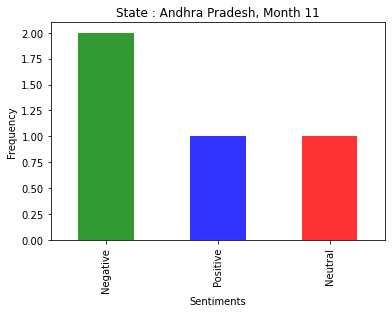

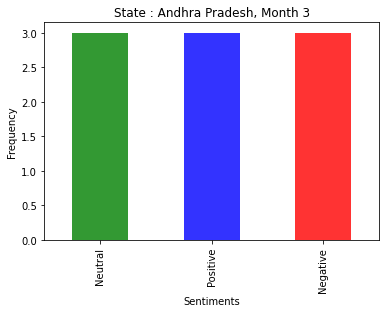

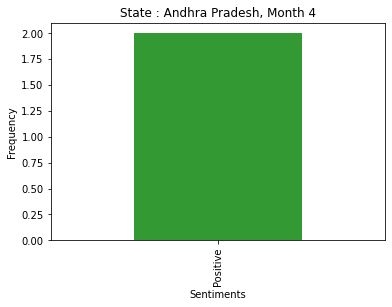

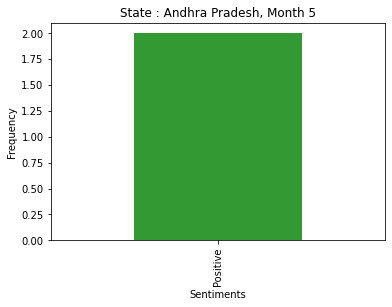

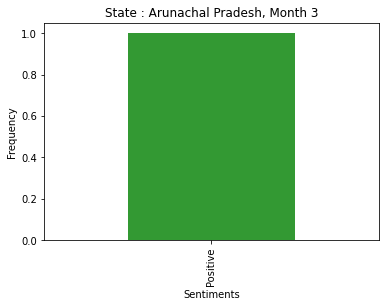

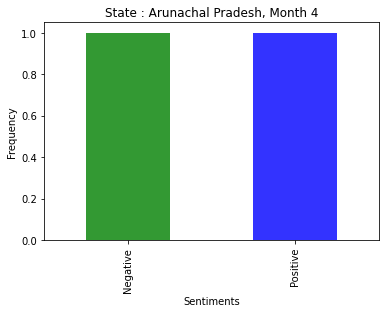

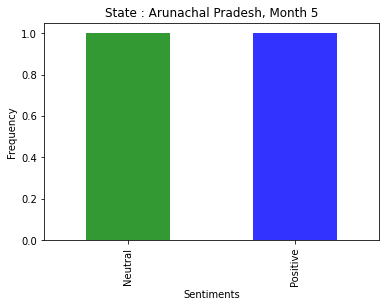

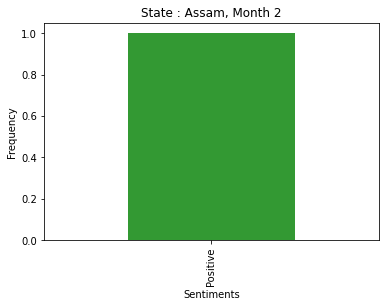

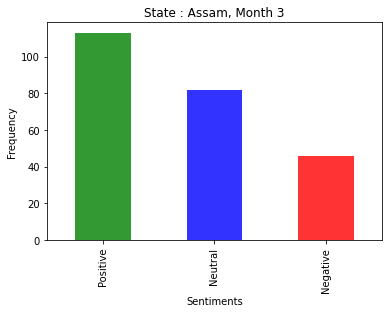

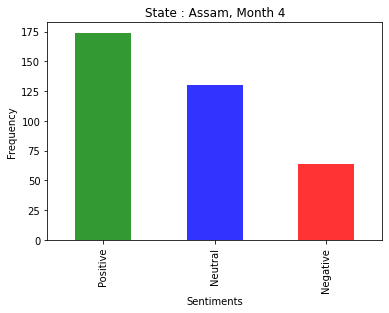

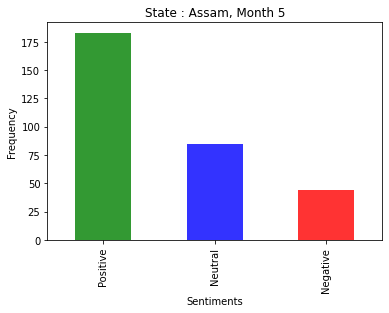

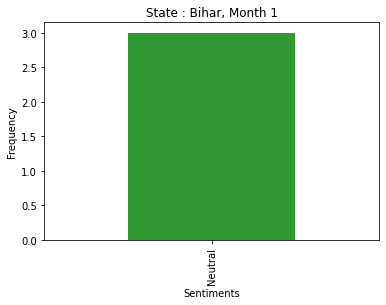

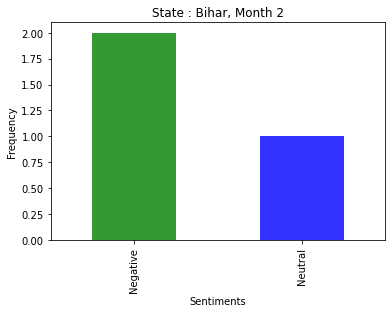

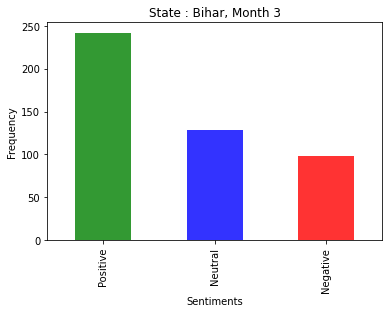

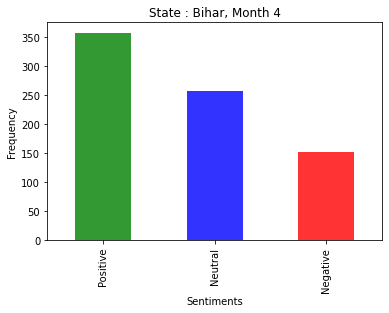

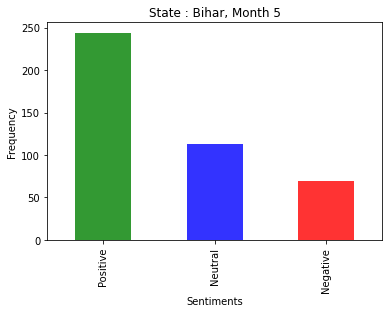

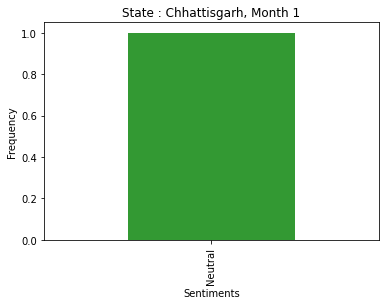

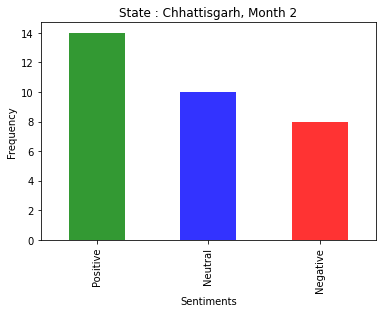

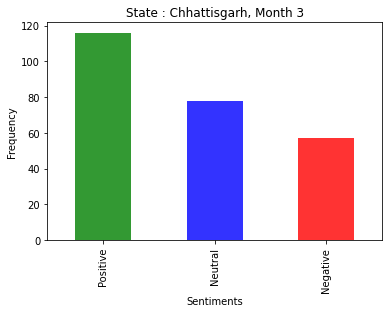

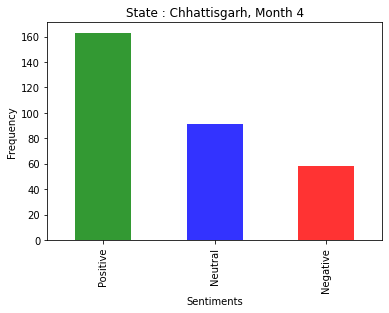

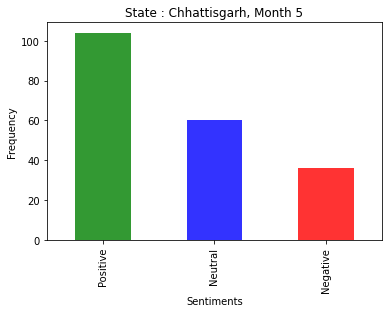

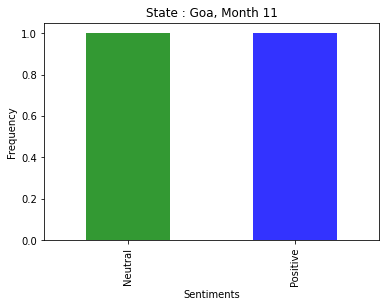

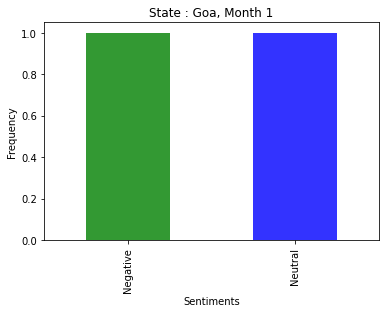

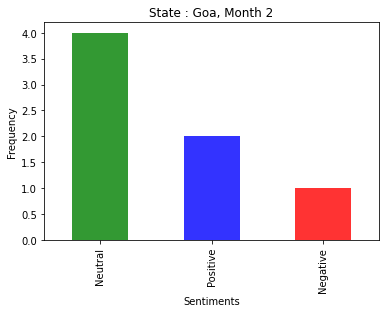

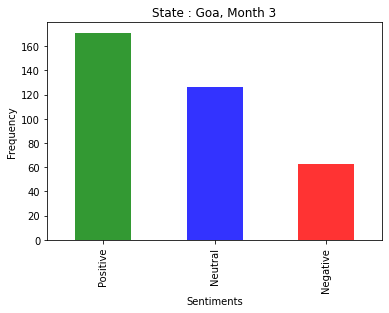

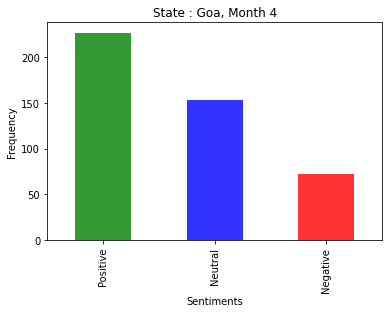

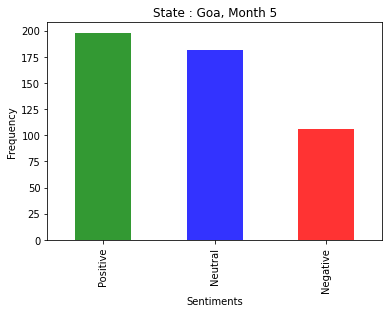

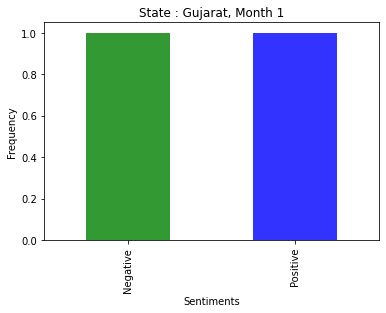

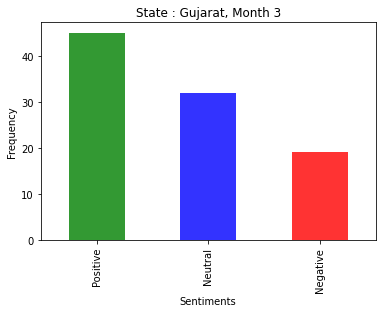

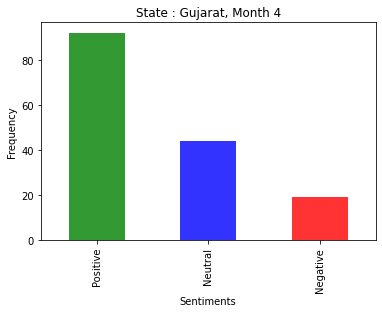

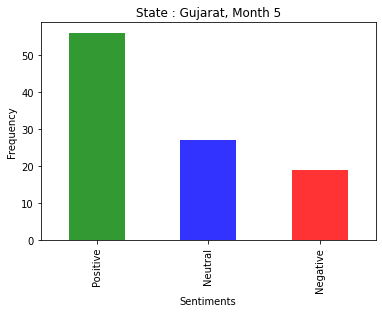

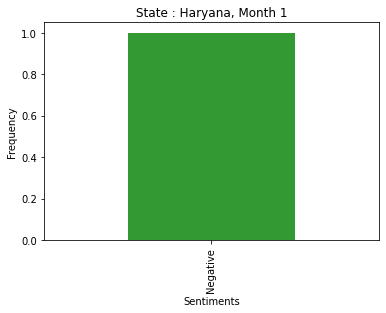

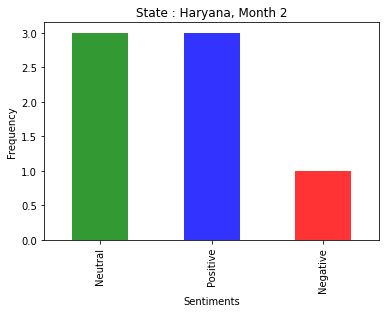

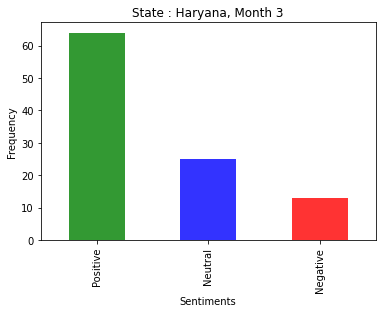

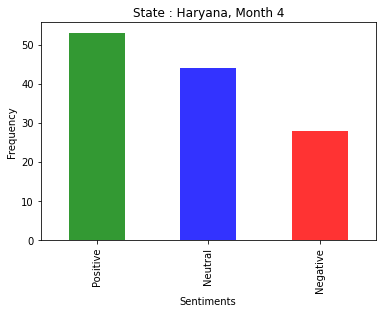

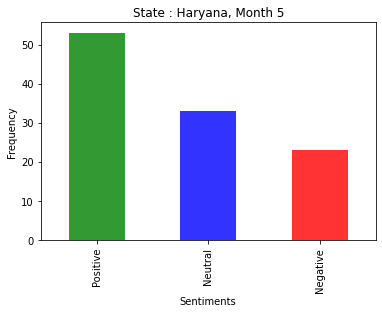

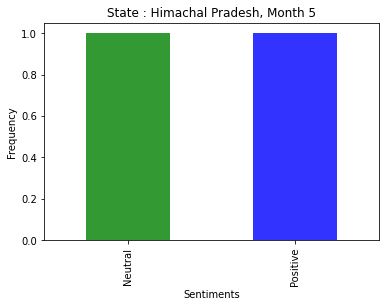

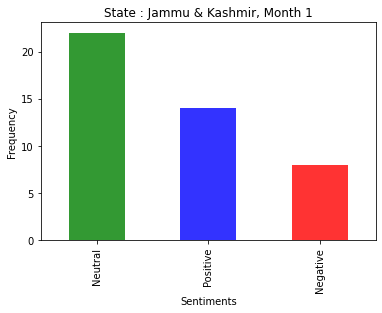

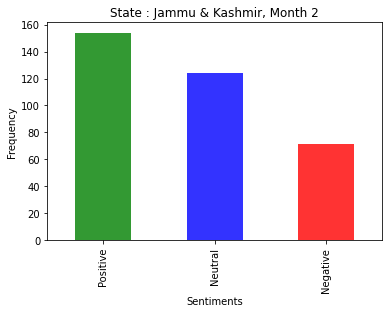

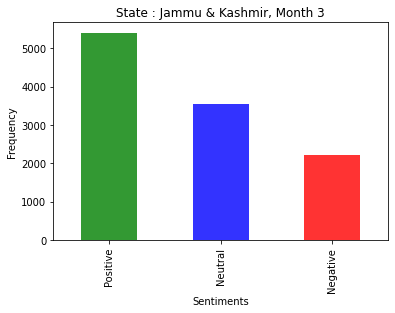

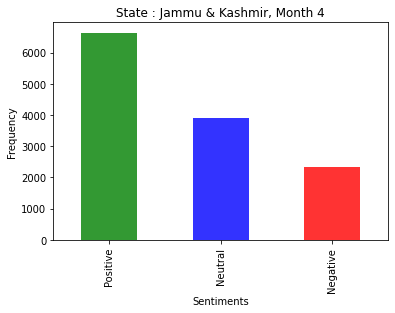

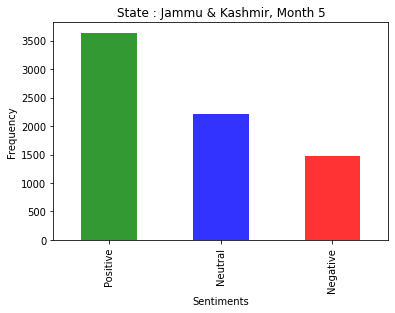

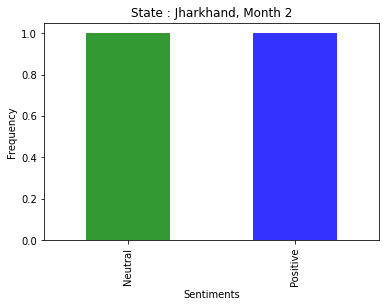

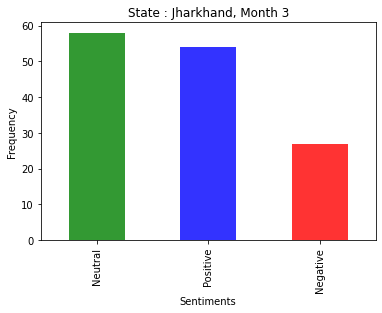

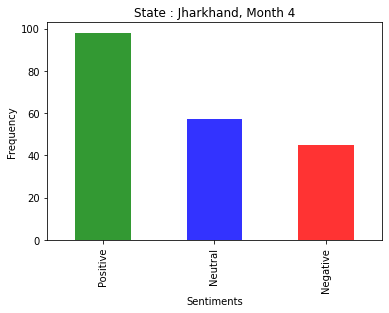

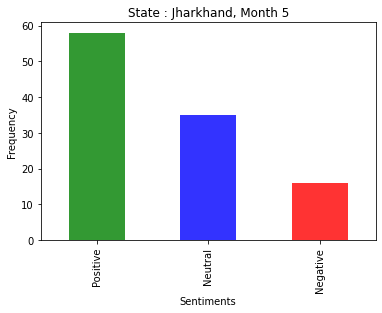

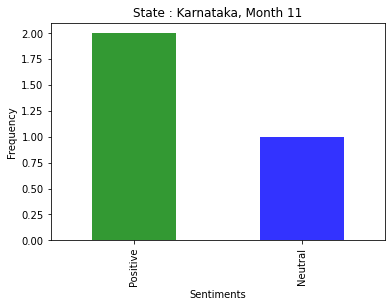

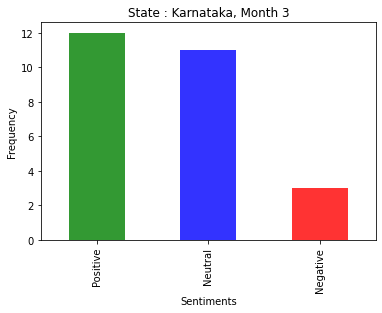

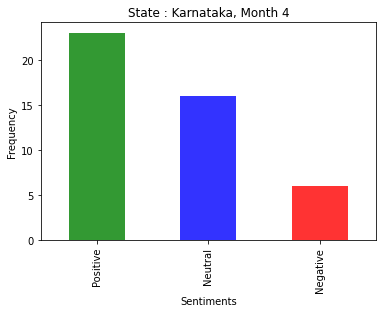

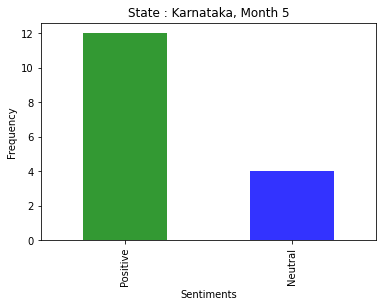

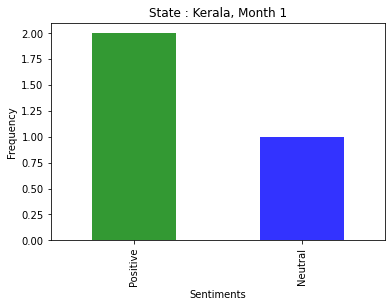

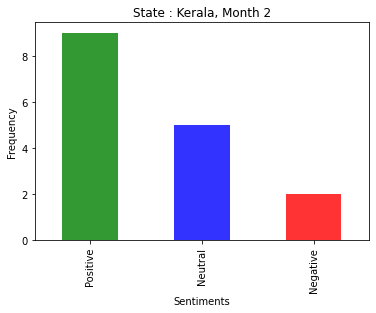

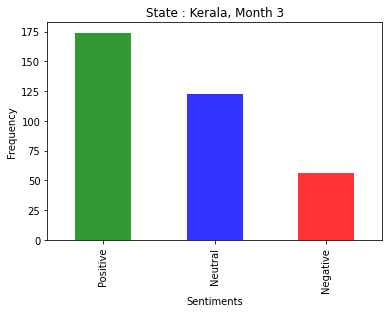

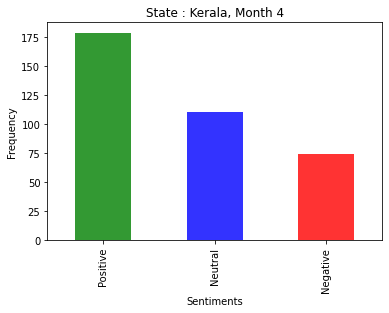

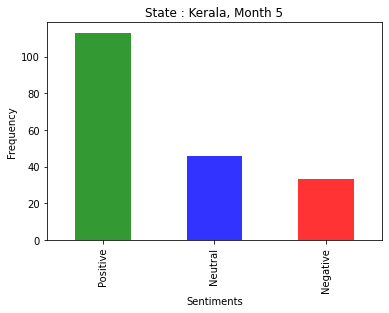

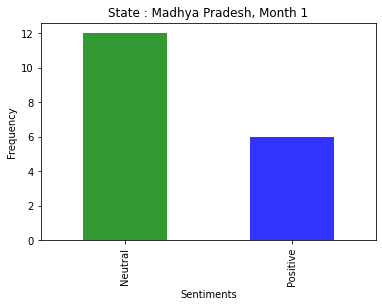

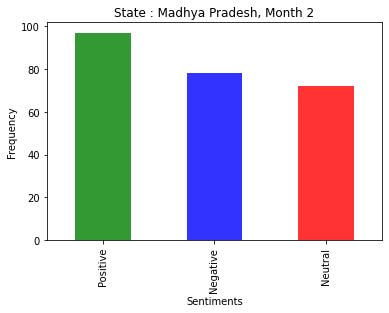

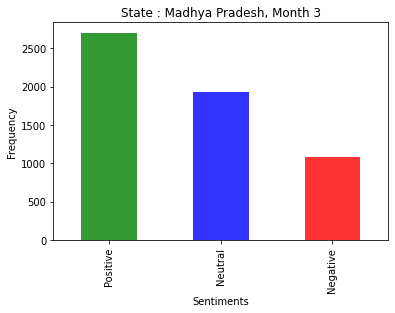

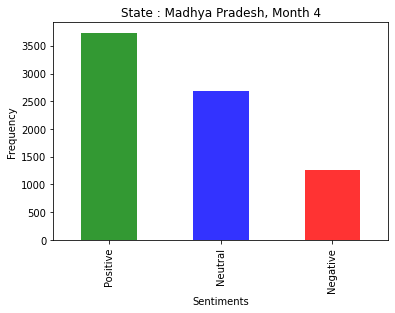

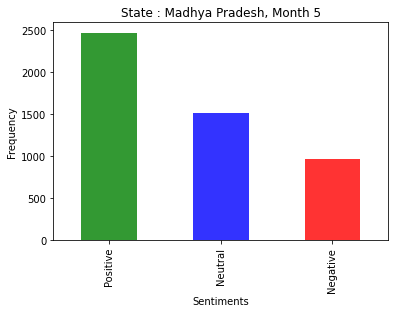

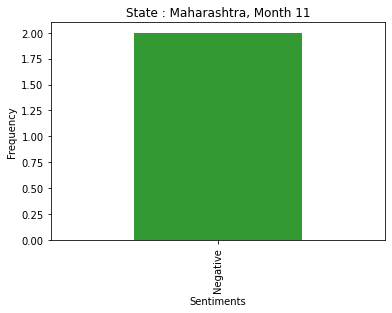

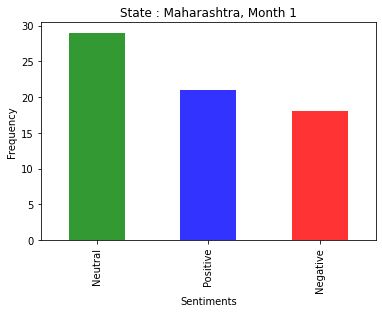

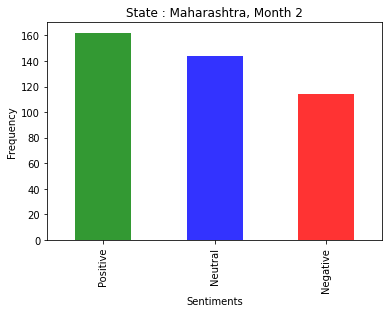

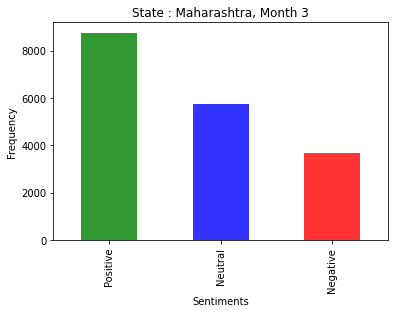

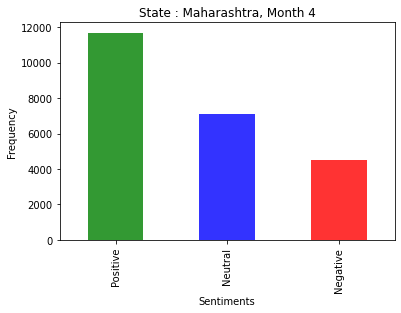

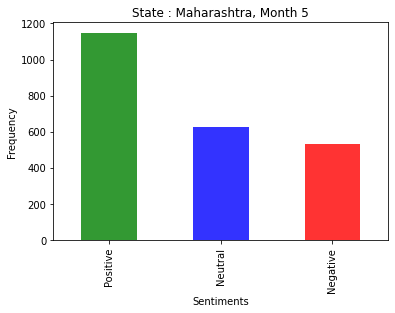

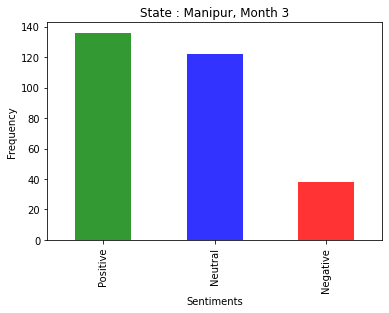

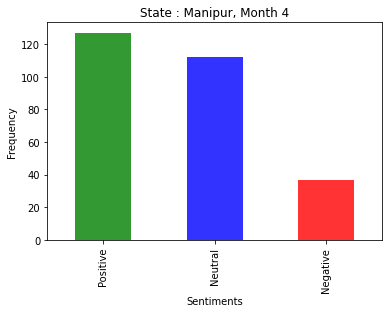

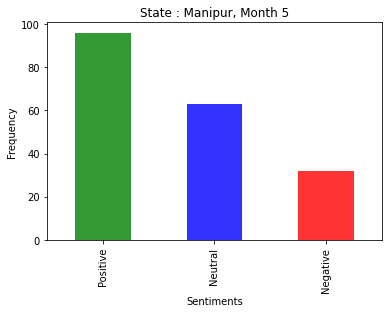

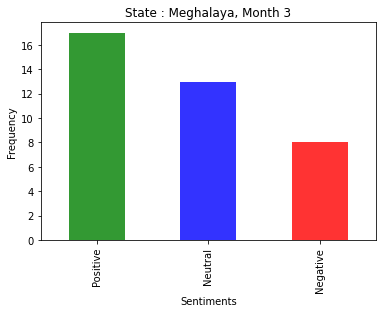

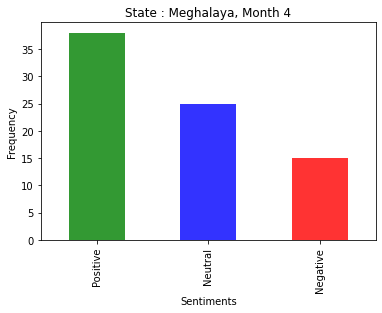

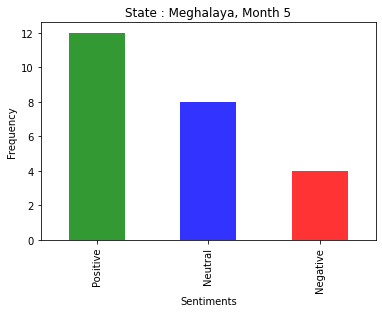

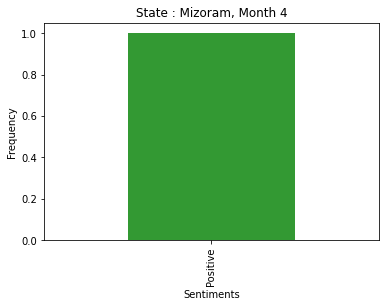

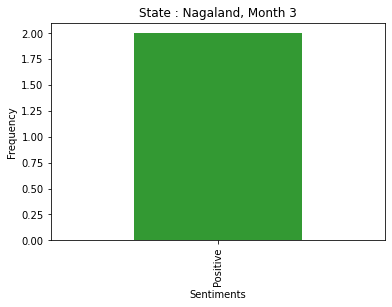

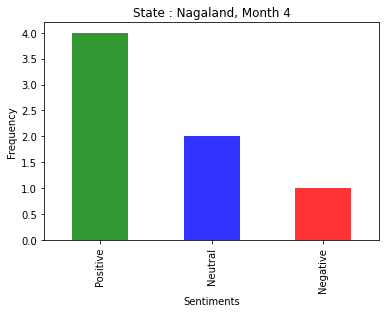

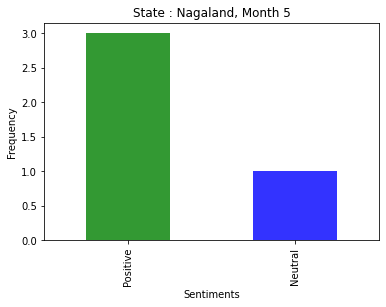

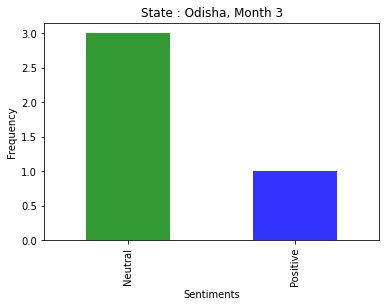

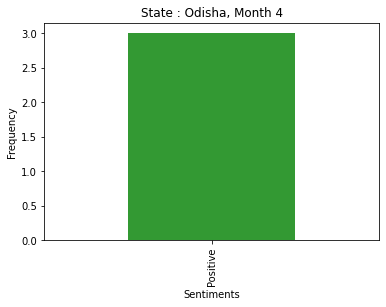

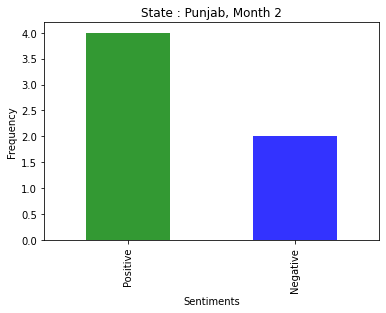

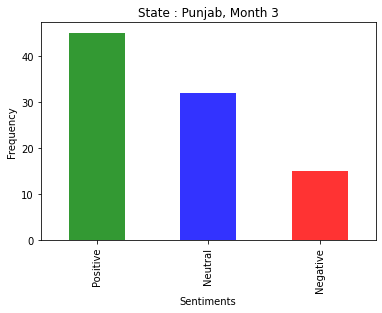

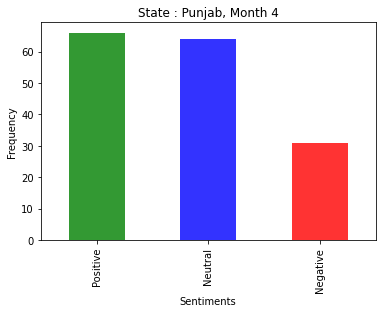

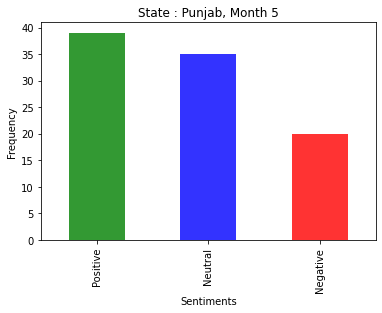

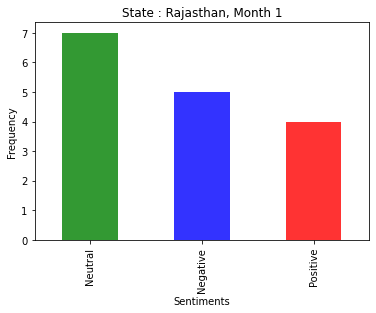

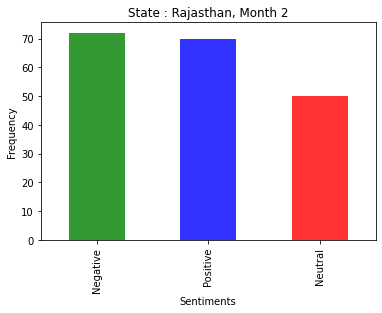

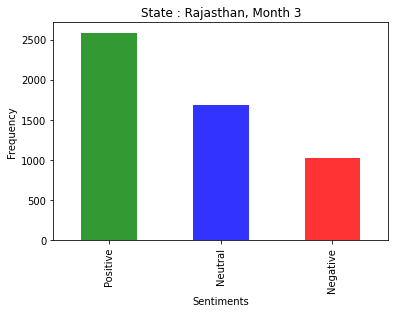

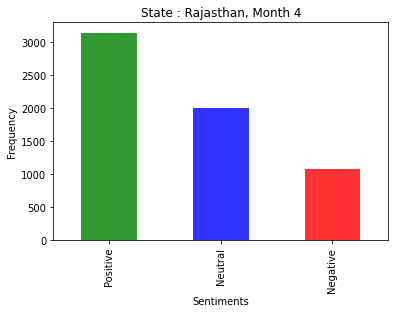

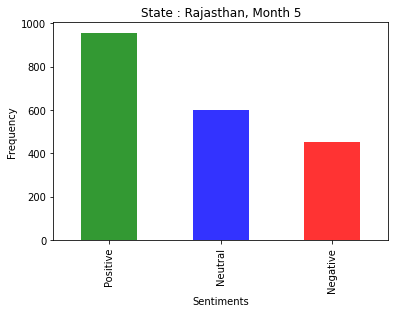

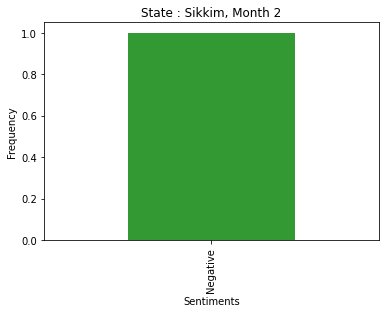

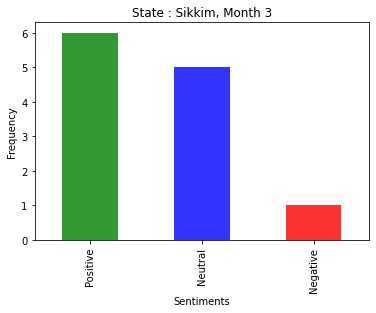

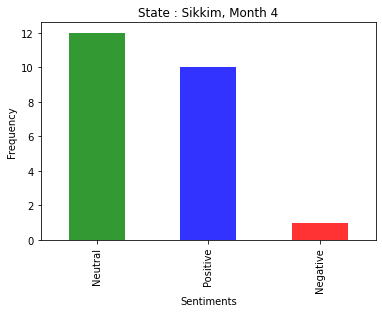

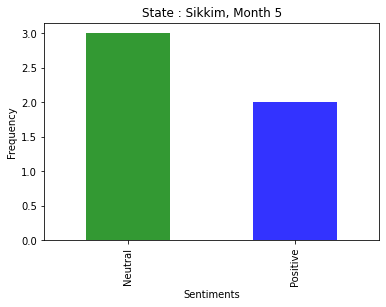

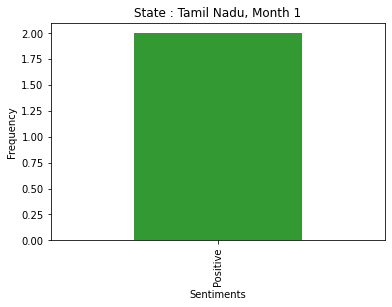

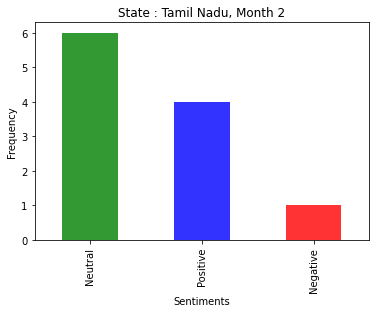

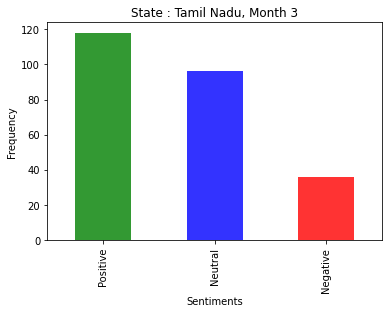

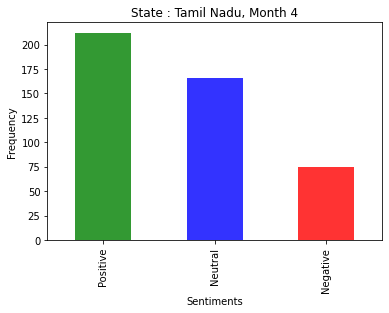

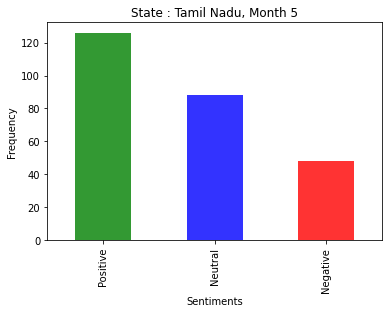

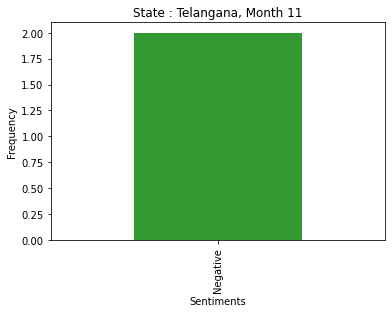

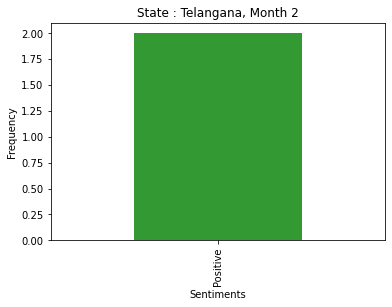

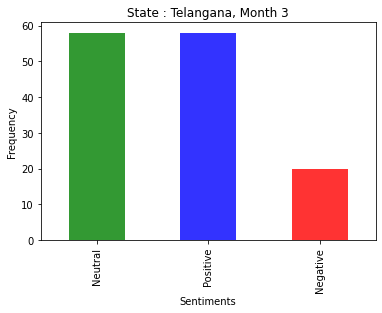

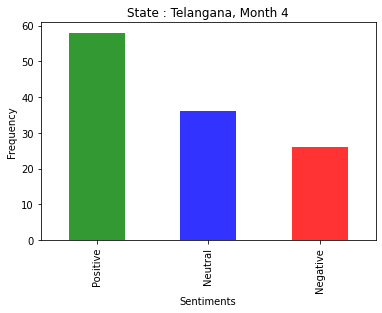

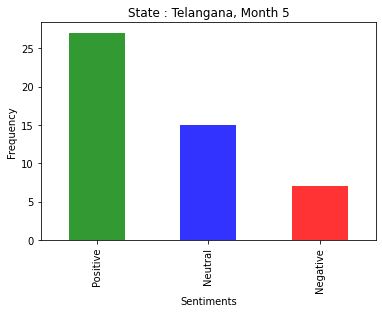

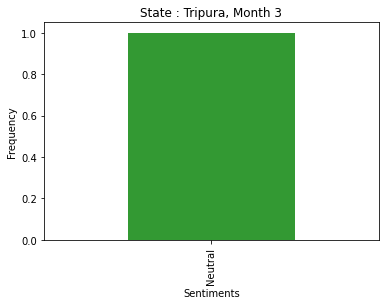

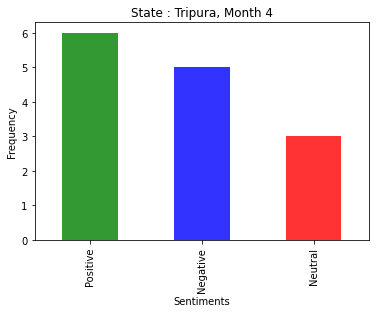

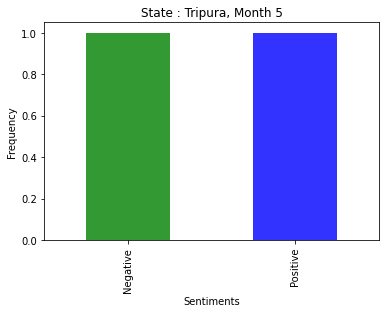

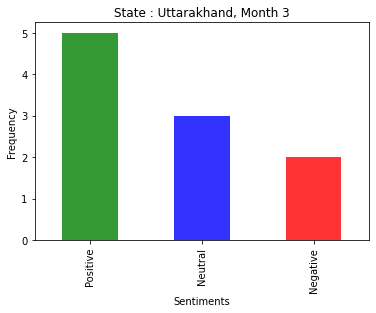

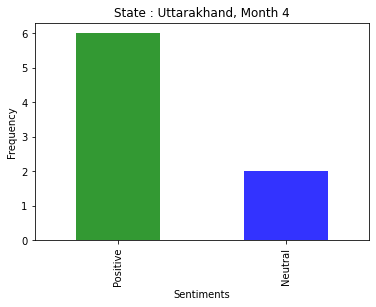

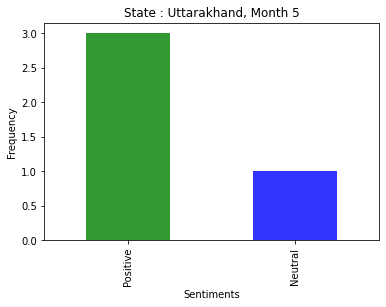

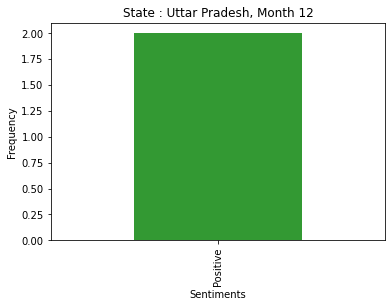

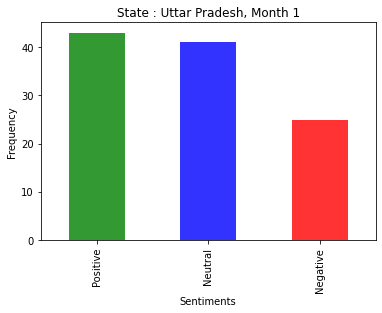

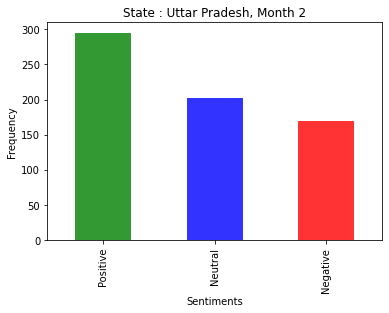

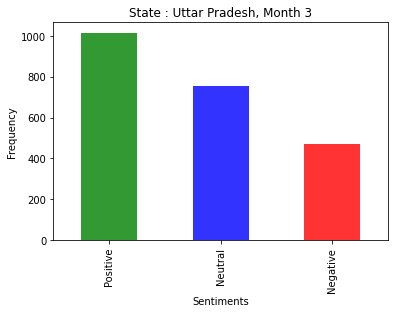

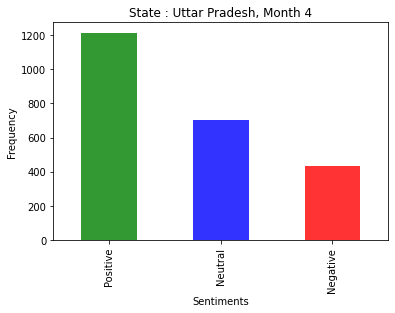

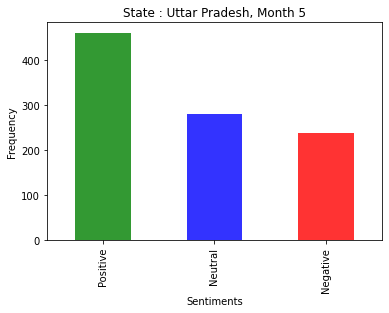

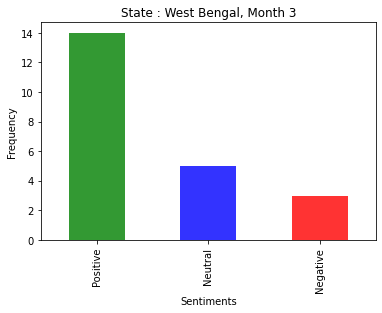

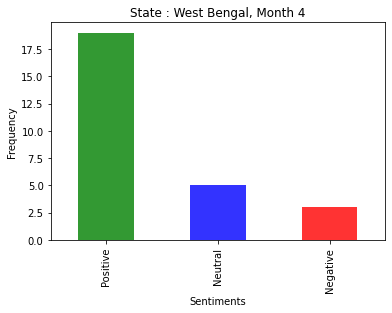

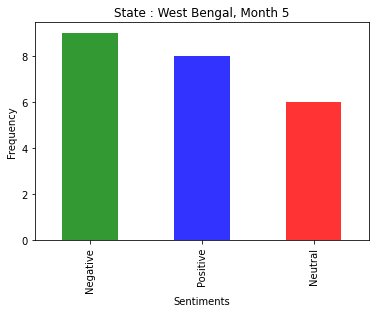

In [0]:
# Code to plot the bar graphs

# Read the combined dataset
df = pd.read_csv('data/all_states_combined_dataset.csv')

for state in states_list: # Loop over all states
  for month in months_list: # Loop over all months

    # Filtering dataset on month
    bool_month = df['Month'] == month
    month_df = df[bool_month]

    # Filtering dataset on state
    bool_state = month_df['State'] == state
    state_month_df = month_df[bool_state]

    # Plotting the Frequencies of Positive, Negetive and Neutral Sentiments
    try:
      state_month_df['Sentiments'].value_counts().plot(kind = 'bar', color=['green', 'blue', 'red'], alpha = 0.8, title  = f'State : {state}, Month {month}')
    except:
      continue

    # Labelling the curve
    plt.xlabel('Sentiments')
    plt.ylabel('Frequency')

    # Showing the final plot
    plt.show()

The above graphs are reperesenting the total count of tweets in a each state during each month starting from December, 2019 to May, 2020. The variation in sentiments as months pass is a fair metric to find out the Psychological effect that the Corona Pandemic had on different states.<br>
Month Number is representing the month:<br>
* **11** = November, 2019
* **12** = December, 2019
* **01** = January, 2020
* **02** = February, 2020
* **03** = March, 2020
* **04** = April, 2020
* **05** = May, 2020<br><br>

This helps us in understanding the overall polarity of public towards COVID-19 in particular months.<br>
We can also see the changing polarities of tweets. <br>
> For Instance Maharashtra (Most Affected State in India)
<table>

<tr>
<th>Month</th>
<th><center>Positive Tweets</center></th>
<th><center>Neutral Tweets</center></th>
<th><center>Negative Tweets</center></th>
</tr>

<tr>
<td>November, 2019</td>
<td><center>0</center></td>
<td><center>0</center></td>
<td><center>2</center></td>
</tr>

<tr>
<td><center>December, 2019</td>
<td><center>0</center></td>
<td><center>0</center></td>
<td><center>0</center></td>
</tr>

<tr>
<td><center>January, 2020</center></td>
<td><center>20-25</center></td>
<td><center>25-30</center></td>
<td><center>15-20</center></td>
</tr>

<tr>
<td><center>February, 2020</center></td>
<td><center>155-160</center></td>
<td><center>140-145</center></td>
<td><center>115-120</center></td>
</tr>

<tr>
<td><center>March, 2020</center></td>
<td><center>> 9000</center></td>
<td><center>> 5500</center></td>
<td><center>> 3800</center></td>
</tr>

<tr>
<td><center>April, 2020</center></td>
<td><center>> 11500</center></td>
<td><center>> 7000</center></td>
<td><center>> 4000</center></td>
</tr>

<tr>
<td><center>May, 2020</center></td>
<td><center>> 1150</center></td>
<td><center>> 600</center></td>
<td><center>> 500</center></td>
</tr>

</table>

##### **+** *This data shows that people in Maharashtra were completly ignorant of the Corona Situation till December.*
##### **+** They picked up some concern about Corona during January-February, but remained mostly unconcerned.
##### **+** *In March, people started to realize the impact of the viral disease and the increase in no. of tweets reflect that.*
##### People remained mostly positive about the situation but no. of negative tweets confirm that situation had started taking a serious front in the state and in people's psychology.
##### **+** *In april, the effect magnified itself to a great extent but more people kept hope, maybe as a result of constant efforts of the government to keep the population away from anxiety.*
##### **+** May data tends to show that people were now lesser concerned about the pandemic and more hopeful about future.

#### **Word Frequency: Top 30 words in the dataset**

In [0]:
# Imports

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

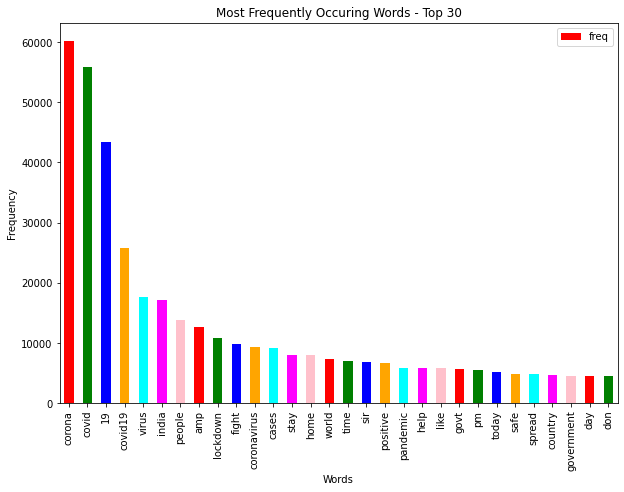

In [0]:
# Code to plot the Word Frequency Chart

# Reading dataset
df = pd.read_csv('data/all_states_combined_dataset.csv')
df.dropna(inplace=True)

# Counting individual words
count_vectorizer = CountVectorizer(stop_words = 'english') # Initializing Count Vectorizer object
words = count_vectorizer.fit_transform(df['Tweets']) # Fitting the object on dataset

# Finding total sum of each word occurences
sum_words = words.sum(axis=0)

# Storing word, word_freq as a list of tuples
words_freq = [(word, sum_words[0, i]) for word, i in count_vectorizer.vocabulary_.items()]
# Sorting based on frequency, non-ascending
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

# Converting to Data Frame
frequency_df = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plotting the data frame
frequency_df.head(30).plot(x='word', y='freq', kind='bar', color = ['red','green','blue','orange','cyan','magenta','pink'], figsize=(10,7))

plt.title("Most Frequently Occuring Words - Top 30") # Title

# Labels
plt.ylabel("Frequency")
plt.xlabel("Words")

plt.show() # Showing the curve

#### **Analysis**
The above frequency plot represent the top 30 most frequently used words in tweets. The word **corona** and **covid** was used most frequently used with a frequency count of more than 50,000 in tweets from november 2019 to may 2020. The words **country**, **government**, **day** and **don** was used less than 6000 times.

##### The **higher end** of the graph contains words like:<br>
    1. corona
    2. covid19
    3. virus
    4. india
    5. people
    6. lockdown
    7. fight
    8. cases
    9. stay
    10. home

> This shows that people's sentiments varied from moderate to highly negative emotions. Overall India spent the months in lockdowns mostly in fear and partly in anguish.


##### The **lower end** of the graph contains words like:<br>
    1. world
    2. pandemic
    3. sir
    4. help
    5. govt
    6. spread
    7. safe

> The right part of the above graph states a different story. It shows people's emotion in that region varied from health worries and outcomes of pandemic to political scenarios. 

##### **Conclusion**: *In India, people remained in mostly in **fear** and **anguish** during lockdowns and **political** and **healthcare worries** took the second spot in their minds*
<br>

***
Now, that we know the most influential sentiments in poeple in India,
we now look at each type of sentiments one by one in below given word clouds.

#### **Word Cloud: Vocabulary from entire database**

In [0]:
# Imports

from wordcloud import WordCloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Tweets')

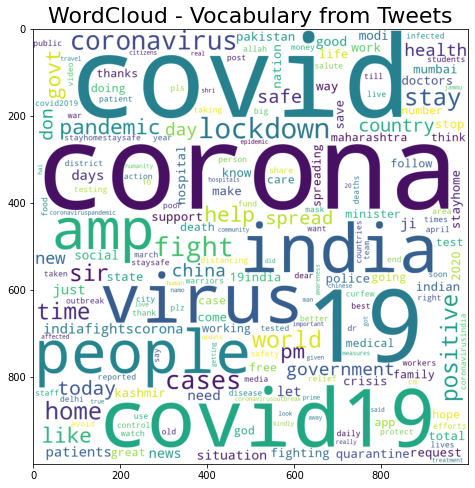

In [0]:
# Code to generate word cloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

# Setting figure size
plt.figure(figsize=(10,8))

# Showing the plot
plt.imshow(wordcloud)

# Setting Title
plt.title("WordCloud - Vocabulary from Tweets", fontsize = 22)


#### **Analysis**
+ The above word cloud represents the vocabulary of word from all the tweets.
+  The words with big text size in word cloud represents that the word is most frequently in the tweets. 
+ Bigger the size of word in the word cloud the higher the frequency of the word in the tweets.
    
#### Some of the most frequently used words according to word cloud are:
    + corona
    + covid19
    + people
    + virus
    + india
    + lockdown
    + pandemic
    + fight
There are some words like **home** , **cases**, and **parents** which represents that people are worriying about going back to their home as number of cases increased.

##### **Conclusion:** People are mostly worried about going back to their home in this pandamic.


#### **Word Cloud: Neutral Words in data**

*These words have direct correlation with Neutral Sentiments or no correlation with the sentiments at all*

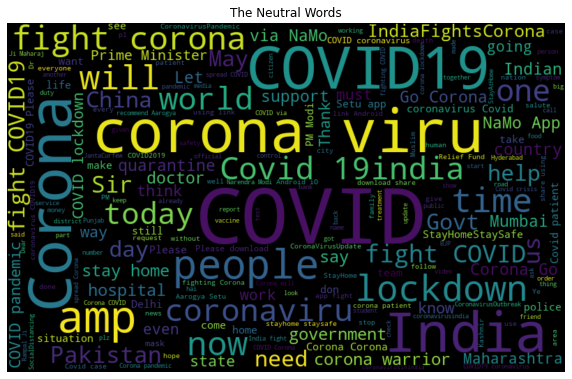

In [0]:
# Generating word list
normal_words =' '.join([text for text in df['Tweets'][df['Sentiments'] == 'Neutral']])

# Generating word clu=oud
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7)) # Setting figure size

# Showing the plot
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words') # Setting the title
plt.show()


#### **Analysis**
+ The above word cloud represents the vocabulary of words with neutral sentiments from all the tweets.
+  The words with big text size in word cloud represents that the word is most frequently in the tweets with neutral sentiments. 
+ Bigger the size of word in the word cloud the higher the frequency of the word in the tweets with neutral sentiments.
    
##### Some of the most frequently used words in neutral tweets according to wordcloud are:
    + fight
    + covid19
    + corona
    + people
    + lockdown
    + india
    + amp etc. 

There are some words like **NaMo App** which states that there was some conversation going on regarding namo goverment application. As well as for **Arogya setu**  there was very less no. of people with neutral behaviour with this application.

##### **Conclusion:** Very less no. of people talked about arogya setu application with neutral sentiment. and a very less no. of people are having neutral sentiment about PM Modi. 

#### **Word Cloud: Negative Words in data**

*These words have direct positive correlation with Negative Sentiments.*

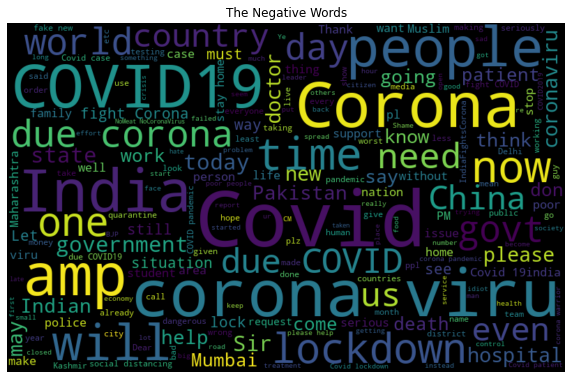

In [0]:
# Generating word list
negative_words =' '.join([text for text in df['Tweets'][df['Sentiments'] == 'Negative']])

# Generating word cloud
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7)) # Setting figure size

# Showing the plot
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words') # Setting title
plt.show()

#### **Analysis**

+ The above word cloud represents the vocabulary of words with negative sentiments from all the tweets.
+  The words with big text size in word cloud represents that the word is most frequently in the tweets with negative sentiments. 
+ Bigger the size of word in the word cloud the higher the frequency of the word in the tweets with negative sentiments.
    
##### Some of the most frequently used words in neutral tweets according to wordcloud are:-
    + covid
    + covid19
    + corona
    + india
    + will
    + due
    + china

Most of the people in india are having negative sentiments with **china** and **Pakistan**. And a major no. of people are having negative thoughts regarding **lockdown**.

#### **Conclusion:** A very less no. of people are having negative thoughts regarding **kashmir** and **social distancing**. Most of the people in india started disliking **china** and **Pakistan**.

#### **Word Cloud: Positive Words in data**

*These words have direct positive correlation with Positive Sentiments.*

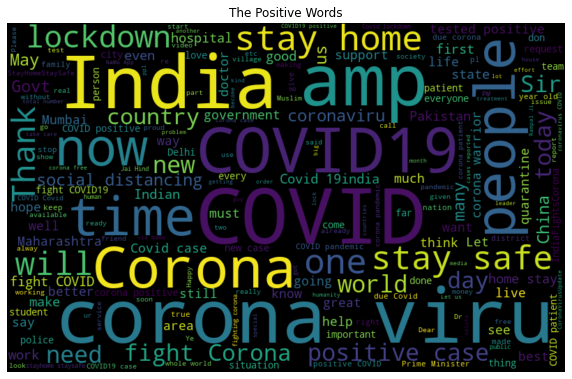

In [0]:
# Generating word list
positive_words =' '.join([text for text in df['Tweets'][df['Sentiments'] == 'Positive']])

# Generating word cloud
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7)) # Setting figure size

# Showing the plot
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words') # Setting title
plt.show()

#### **Analysis**

+ The above word cloud represents the vocabulary of words with positive sentiments from all the tweets.
+  The words with big text size in word cloud represents that the word is most frequently in the tweets with positive sentiments. 
+ Bigger the size of word in the word cloud the higher the frequency of the word in the tweets with positive sentiments.

> A large no. of people in india was having positive sentiments regarding their own country **India**. But there was vary less no. of people who was having positive sentiments regarding the **covid patients** and **quarantine**. 

##### **Conclusion:** Very large no. of people ae having positive sentiments regarding corona in india as air pollution reduced due to lockdown and some of them are happy in spending this time with their famalies.

# **Results**


In [0]:
# Imports

import pandas as pd

In [0]:
# List of Indian States
states_list = [
  'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
  'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
  'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
  'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
  'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
  'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal',
]

# List of Months for which Polarities have to be found
months_list = ['11', '12', '01', '02', '03', '04', '05'] # Nov, 2019 - to - May, 2020

In [0]:
# Initializing Result Dictionaries

neutral_percentage = dict()
negative_percentage = dict()
positive_percentage = dict()

In [0]:
# Code to formulate Results

for state in states_list: # Looping over states
  for month in months_list: # Looping over months
    file_name = f"data/Tweets With Polarity/{state}_{month}_polarity.csv"

    # Reading data
    df = pd.read_csv(file_name)
    total_count = df.shape[0] # Total data points

    # Initializing counters
    pos = 0
    neg = 0
    neu = 0

    # Updating Counters
    for i in range(df.shape[0]):
      if df['Sentiments'][i] == "Positive": # Positive Case
        pos += 1
      elif df['Sentiments'][i] == "Negative": # Negative Case
        neg += 1
      else: # Neutral Case
        neu += 1
    
    # Combining State and Month in a single string
    key = state + "_" + month

    # Finding percentages
    try:
      pos_percentage = (pos / total_count) * 100
      neg_percentage = (neg / total_count) * 100
      neu_percentage = (neu / total_count) * 100

      # Saving percentages
      negative_percentage[key] = neg_percentage
      positive_percentage[key] = pos_percentage
      neutral_percentage[key] = neu_percentage
    except: # Incase file is empty
      print("-", end='') # Just skip it


---------------------------------------------------------------------------------------

### Statewise Analysis

#### Negative Sentiments

In [0]:
# Month dictionary for formatting result
months_dict = {'11': 'Nov, 2019', '12': 'Dec, 2019',
               '01': 'Jan, 2020', '02': 'Feb, 2020',
               '03': 'Mar, 2020', '04': 'Apr, 2020',
               '05': 'May, 2020'
}

# Negetive Tweets percentages
for state, neg_value in negative_percentage.items():
  print(f"{state[:-3]:17s} - {months_dict[state[-2:]]:9s}:    {neg_value:.2f} %")


Andhra Pradesh    - Nov, 2019:    50.00 %
Andhra Pradesh    - Mar, 2020:    33.33 %
Andhra Pradesh    - Apr, 2020:    0.00 %
Andhra Pradesh    - May, 2020:    0.00 %
Arunachal Pradesh - Mar, 2020:    0.00 %
Arunachal Pradesh - Apr, 2020:    50.00 %
Arunachal Pradesh - May, 2020:    0.00 %
Assam             - Feb, 2020:    0.00 %
Assam             - Mar, 2020:    19.09 %
Assam             - Apr, 2020:    17.39 %
Assam             - May, 2020:    14.10 %
Bihar             - Jan, 2020:    0.00 %
Bihar             - Feb, 2020:    66.67 %
Bihar             - Mar, 2020:    20.90 %
Bihar             - Apr, 2020:    19.87 %
Bihar             - May, 2020:    16.20 %
Chhattisgarh      - Jan, 2020:    0.00 %
Chhattisgarh      - Feb, 2020:    25.00 %
Chhattisgarh      - Mar, 2020:    22.71 %
Chhattisgarh      - Apr, 2020:    18.59 %
Chhattisgarh      - May, 2020:    18.00 %
Goa               - Nov, 2019:    0.00 %
Goa               - Jan, 2020:    50.00 %
Goa               - Feb, 2020:    14.29 %



#### Neutral Sentiments

In [0]:
# Neutral Tweets percentages
for state, neu_value in neutral_percentage.items():
  print(f"{state[:-3]:17s} - {months_dict[state[-2:]]:9s}:    {neu_value:.2f} %")

Andhra Pradesh    - Nov, 2019:    25.00 %
Andhra Pradesh    - Mar, 2020:    33.33 %
Andhra Pradesh    - Apr, 2020:    0.00 %
Andhra Pradesh    - May, 2020:    0.00 %
Arunachal Pradesh - Mar, 2020:    0.00 %
Arunachal Pradesh - Apr, 2020:    0.00 %
Arunachal Pradesh - May, 2020:    50.00 %
Assam             - Feb, 2020:    0.00 %
Assam             - Mar, 2020:    34.02 %
Assam             - Apr, 2020:    35.33 %
Assam             - May, 2020:    27.24 %
Bihar             - Jan, 2020:    100.00 %
Bihar             - Feb, 2020:    33.33 %
Bihar             - Mar, 2020:    27.51 %
Bihar             - Apr, 2020:    33.46 %
Bihar             - May, 2020:    26.53 %
Chhattisgarh      - Jan, 2020:    100.00 %
Chhattisgarh      - Feb, 2020:    31.25 %
Chhattisgarh      - Mar, 2020:    31.08 %
Chhattisgarh      - Apr, 2020:    29.17 %
Chhattisgarh      - May, 2020:    30.00 %
Goa               - Nov, 2019:    50.00 %
Goa               - Jan, 2020:    50.00 %
Goa               - Feb, 2020:    57.

#### Positive Sentiments

In [0]:
# Positive Tweets percentages
for state, pos_value in positive_percentage.items():
  print(f"{state[:-3]:17s} - {months_dict[state[-2:]]:9s}:    {pos_value:.2f} %")

Andhra Pradesh    - Nov, 2019:    25.00 %
Andhra Pradesh    - Mar, 2020:    33.33 %
Andhra Pradesh    - Apr, 2020:    100.00 %
Andhra Pradesh    - May, 2020:    100.00 %
Arunachal Pradesh - Mar, 2020:    100.00 %
Arunachal Pradesh - Apr, 2020:    50.00 %
Arunachal Pradesh - May, 2020:    50.00 %
Assam             - Feb, 2020:    100.00 %
Assam             - Mar, 2020:    46.89 %
Assam             - Apr, 2020:    47.28 %
Assam             - May, 2020:    58.65 %
Bihar             - Jan, 2020:    0.00 %
Bihar             - Feb, 2020:    0.00 %
Bihar             - Mar, 2020:    51.60 %
Bihar             - Apr, 2020:    46.67 %
Bihar             - May, 2020:    57.28 %
Chhattisgarh      - Jan, 2020:    0.00 %
Chhattisgarh      - Feb, 2020:    43.75 %
Chhattisgarh      - Mar, 2020:    46.22 %
Chhattisgarh      - Apr, 2020:    52.24 %
Chhattisgarh      - May, 2020:    52.00 %
Goa               - Nov, 2019:    50.00 %
Goa               - Jan, 2020:    0.00 %
Goa               - Feb, 2020:    

############## results explaination


## **Conclusions**

understrandings from analyss

how can this affect the use cases selected above

# **Thanks yous and Citations if any**
